___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [3]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7032, 21)

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [25]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [27]:
# CODE HERE
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [43]:
# CODE HERE
np.sum(df.isna(), axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

C:\Users\rd\AppData\Local\Temp\ipykernel_8300\4073347802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette=sns.color_palette("tab10"))
C:\Users\rd\AppData\Local\Temp\ipykernel_8300\4073347802.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x="Churn", palette=sns.color_palette("tab10"))


<Axes: xlabel='Churn', ylabel='count'>

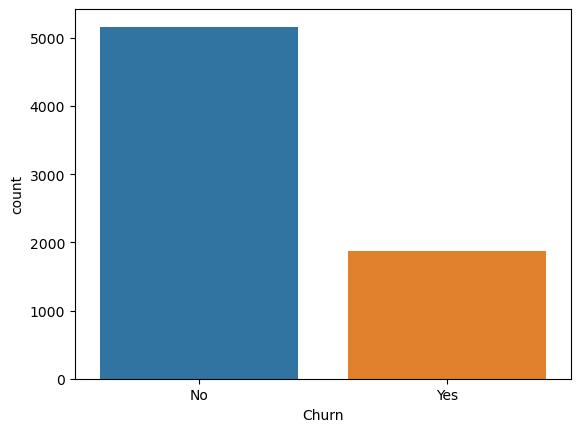

In [62]:
# CODE HERE
sns.countplot(data=df, x="Churn", palette=sns.color_palette("tab10"))

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: ylabel='TotalCharges'>

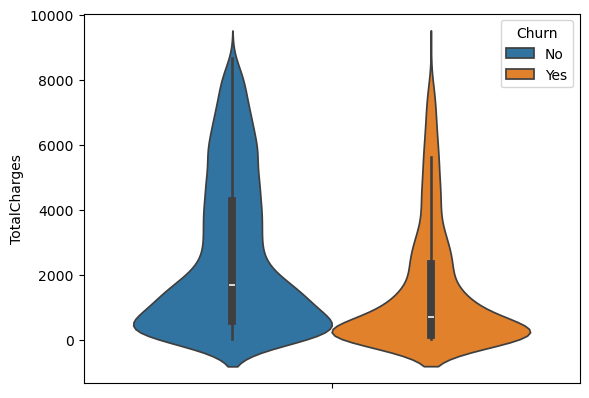

In [64]:
# CODE HERE
sns.violinplot(data=df, y="TotalCharges", hue="Churn")

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

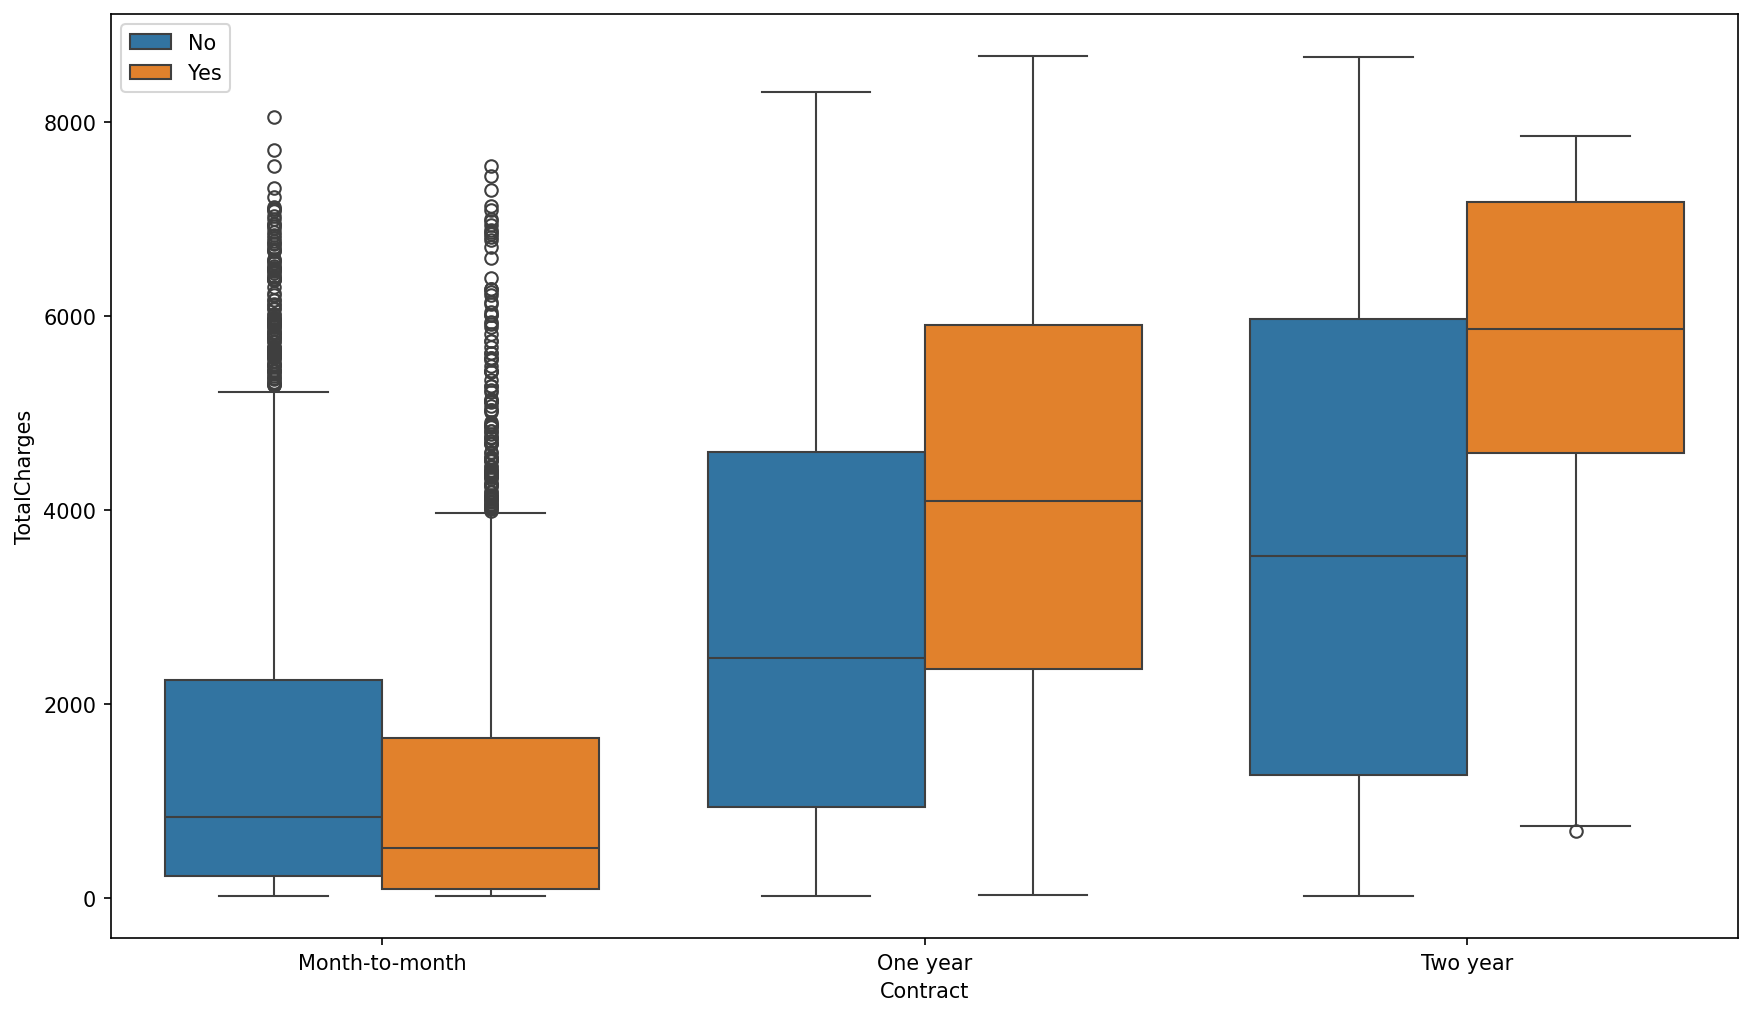

In [86]:
#CODE HERE
plt.figure(figsize=(14, 8), dpi=150)
sns.boxplot(data=df, x="Contract", y="TotalCharges", hue="Churn")
plt.legend(loc=2)

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [88]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [114]:
df.shape

(7032, 21)

In [159]:
dummies_colum =['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']
len(dummies_colum)

17

In [161]:
#CODE HERE
df_dummies = pd.get_dummies(data=df, columns=dummies_colum)

In [163]:
df_dummies.shape

(7032, 49)

In [138]:
df_dummies.corr(numeric_only=True).head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.246862,0.825880,-0.005285,0.005285,-0.015683,0.015683,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.246862,1.000000,0.651065,0.013779,-0.013779,-0.219874,0.219874,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.825880,0.651065,1.000000,-0.000048,0.000048,-0.102411,0.102411,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
gender_Female,-0.005285,0.013779,-0.000048,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,0.005285,-0.013779,0.000048,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199


In [165]:
df_corr = df_dummies.corr(numeric_only=True)

In [171]:
type(df.corr)

method

In [175]:
df_corr.columns.shape

(48,)

In [205]:
df_corr_sort = df_corr["Churn_Yes"].sort_values()[1:-1]

In [216]:
df_corr_sort.values

array([-0.35404936, -0.30155234, -0.22757762, -0.22757762, -0.22757762,
       -0.22757762, -0.22757762, -0.22757762, -0.22757762, -0.19948408,
       -0.19145432, -0.17822502, -0.17126992, -0.16471591, -0.16312844,
       -0.15054105, -0.14998193, -0.13468684, -0.12414143, -0.118136  ,
       -0.09077285, -0.08230697, -0.06619252, -0.0326536 , -0.0116914 ,
       -0.0116914 , -0.00854464,  0.00854464,  0.0116914 ,  0.04003274,
        0.06085994,  0.06325398,  0.12843503,  0.1309203 ,  0.14998193,
        0.15054105,  0.16312844,  0.19145432,  0.19285822,  0.25205563,
        0.26759512,  0.30145464,  0.30746259,  0.3368771 ,  0.3422352 ,
        0.40456455])

C:\Users\rd\AppData\Local\Temp\ipykernel_8300\740499338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_corr_sort.index, y=df_corr_sort.values, palette="Set1")


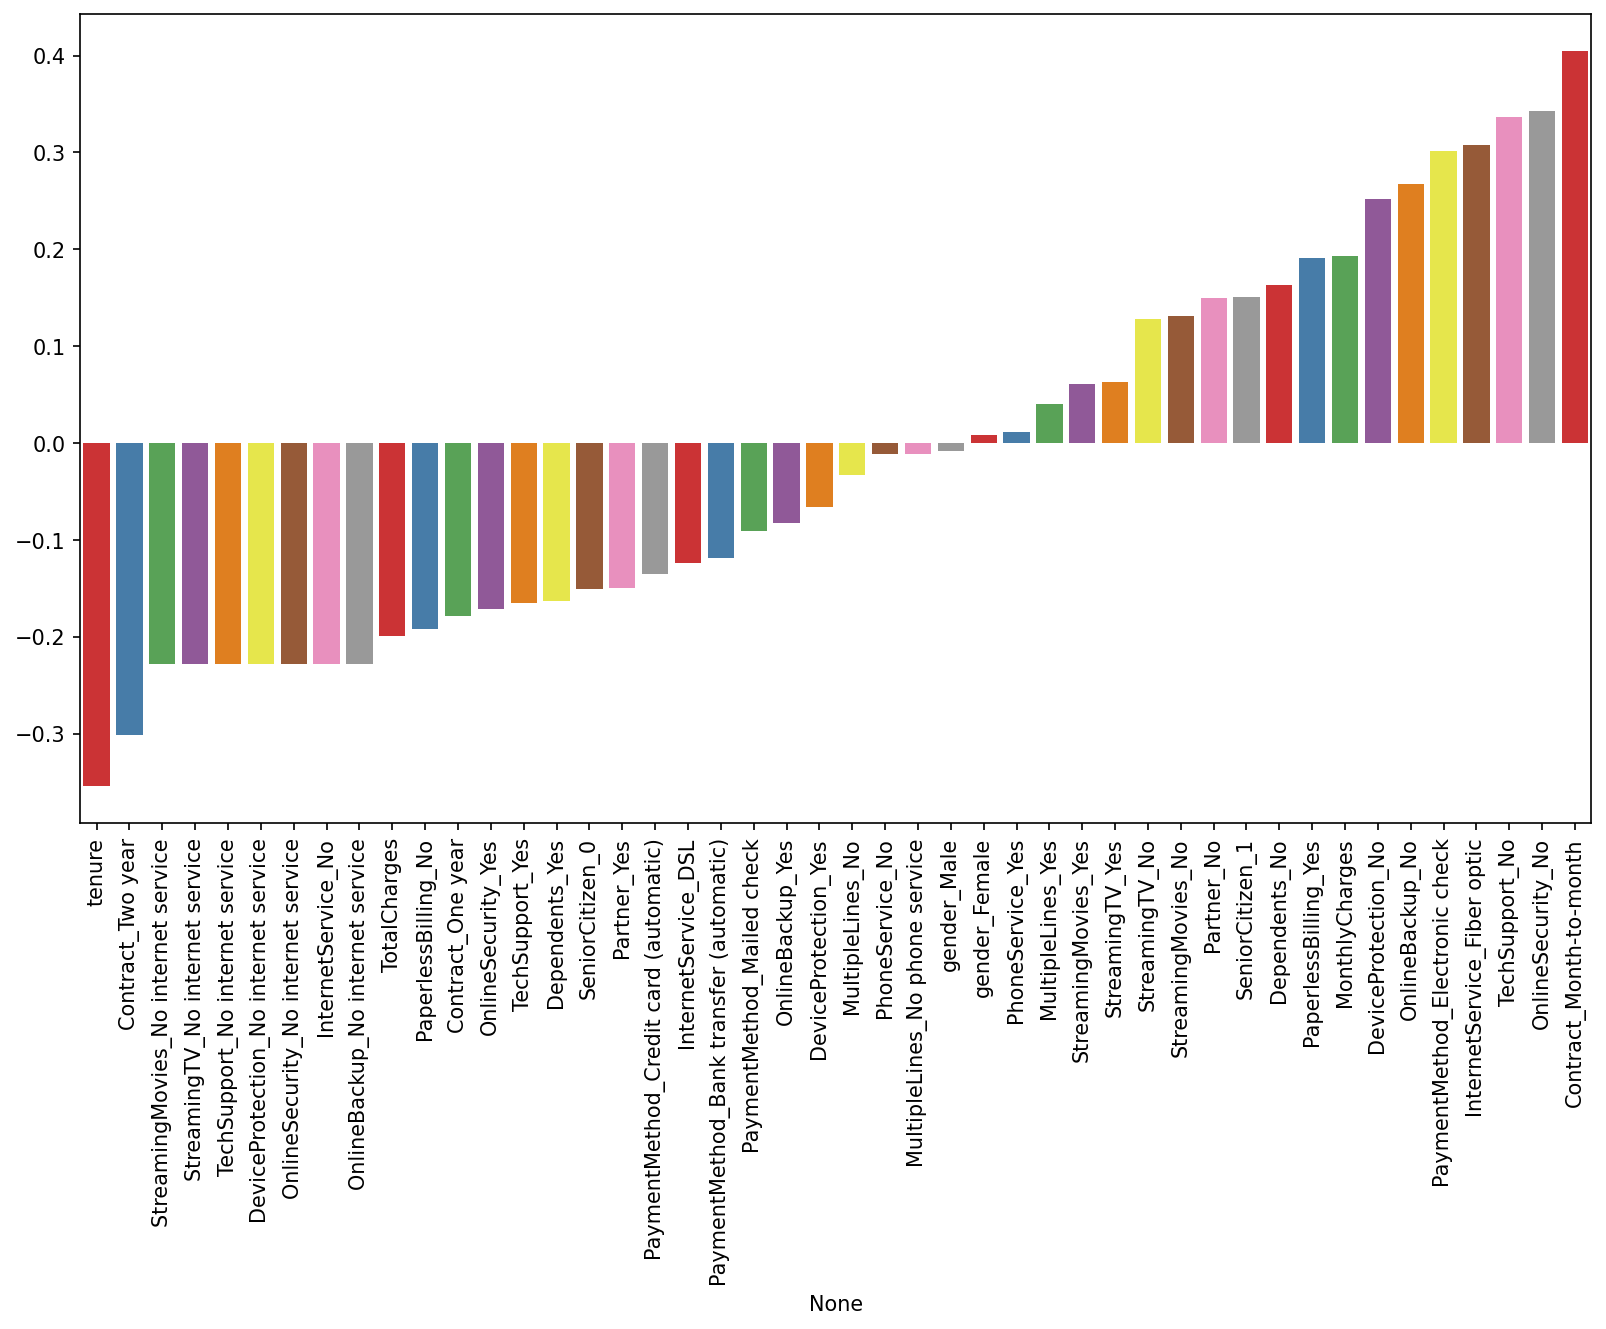

In [227]:
plt.figure(figsize=(13, 7), dpi=150)
sns.barplot(x=df_corr_sort.index, y=df_corr_sort.values, palette="Set1")
plt.xticks(rotation=90);

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [7]:
# CODE HERE
np.array(df["Contract"].value_counts().index)

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='tenure', ylabel='Count'>

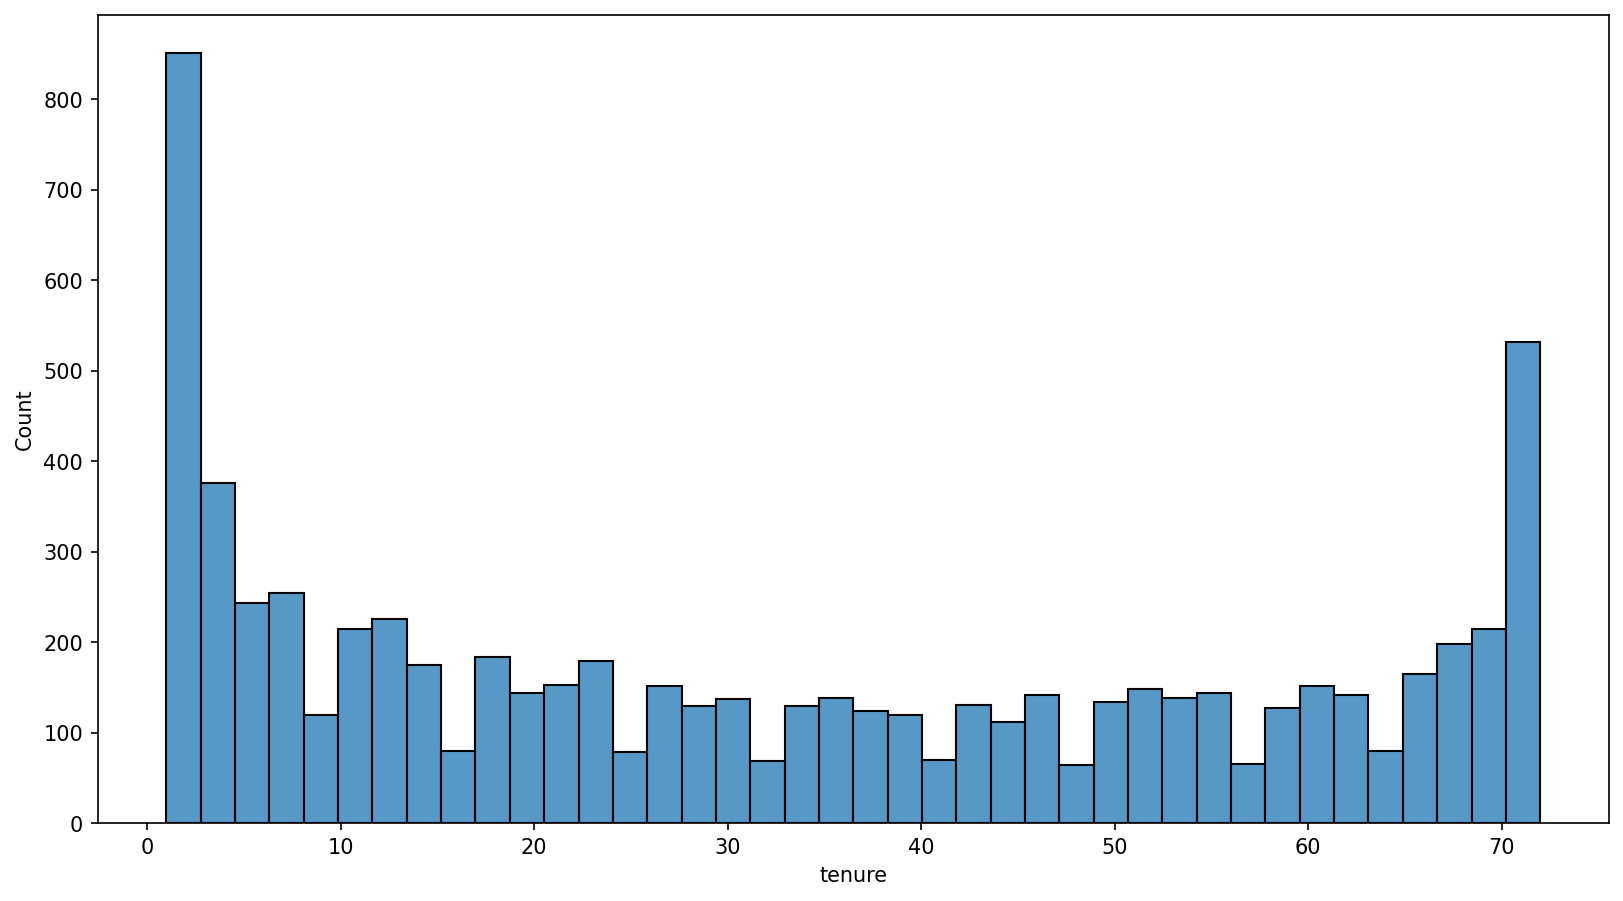

<Axes: xlabel='tenure', ylabel='Count'>

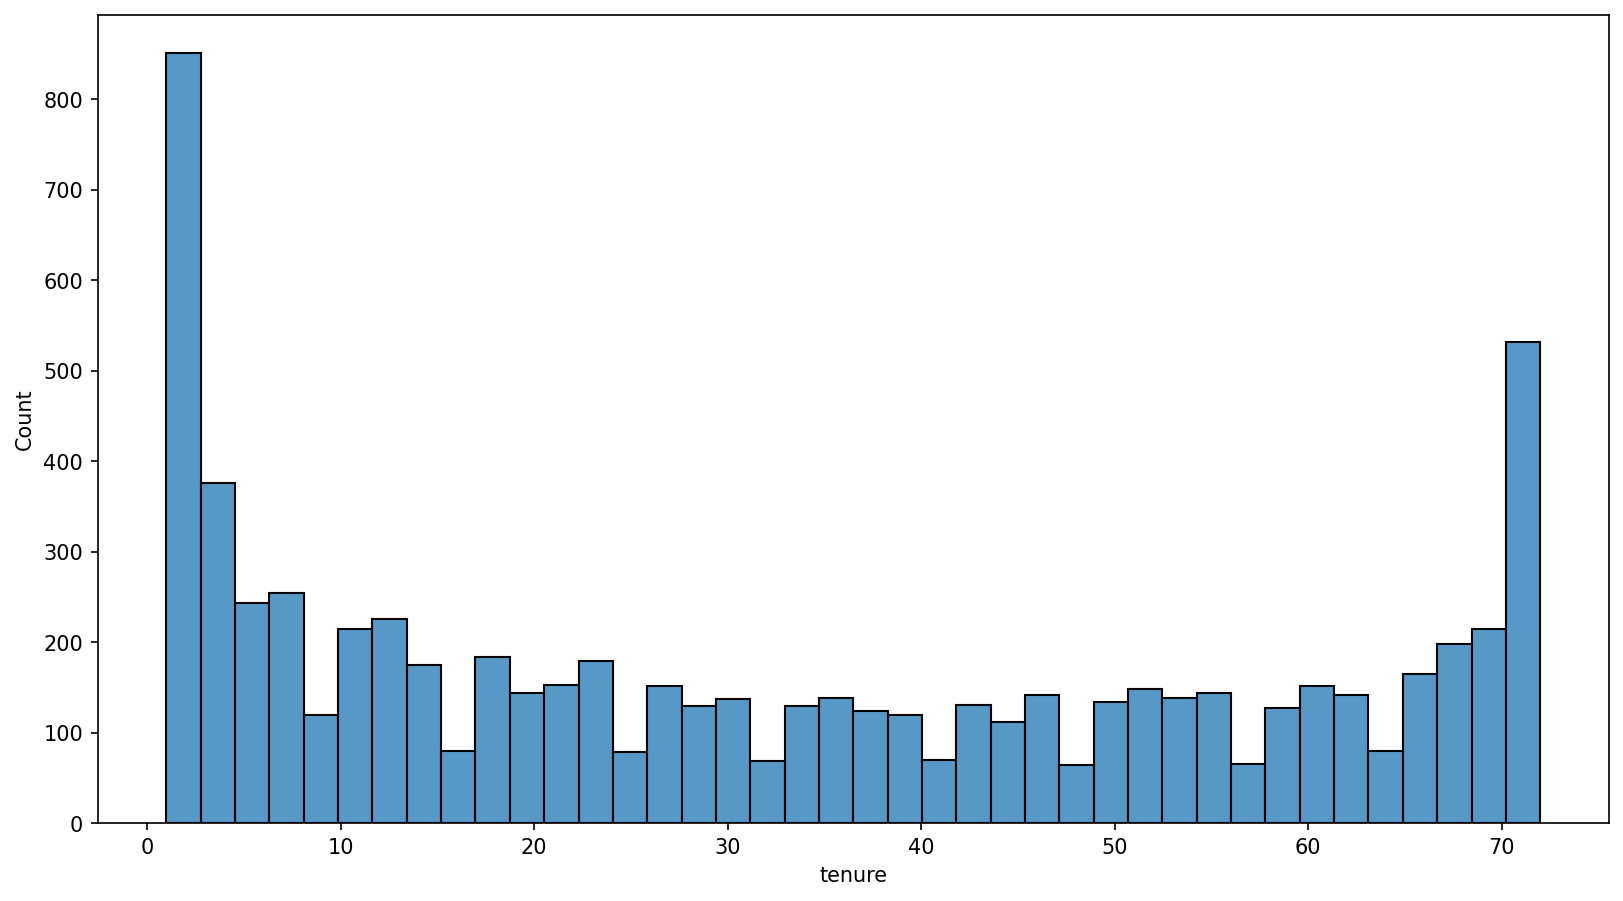

In [47]:
#CODE HERE
plt.figure(figsize=(13, 7), dpi=150)
sns.histplot(data=df, x="tenure", bins=40)

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 1950x1050 with 0 Axes>

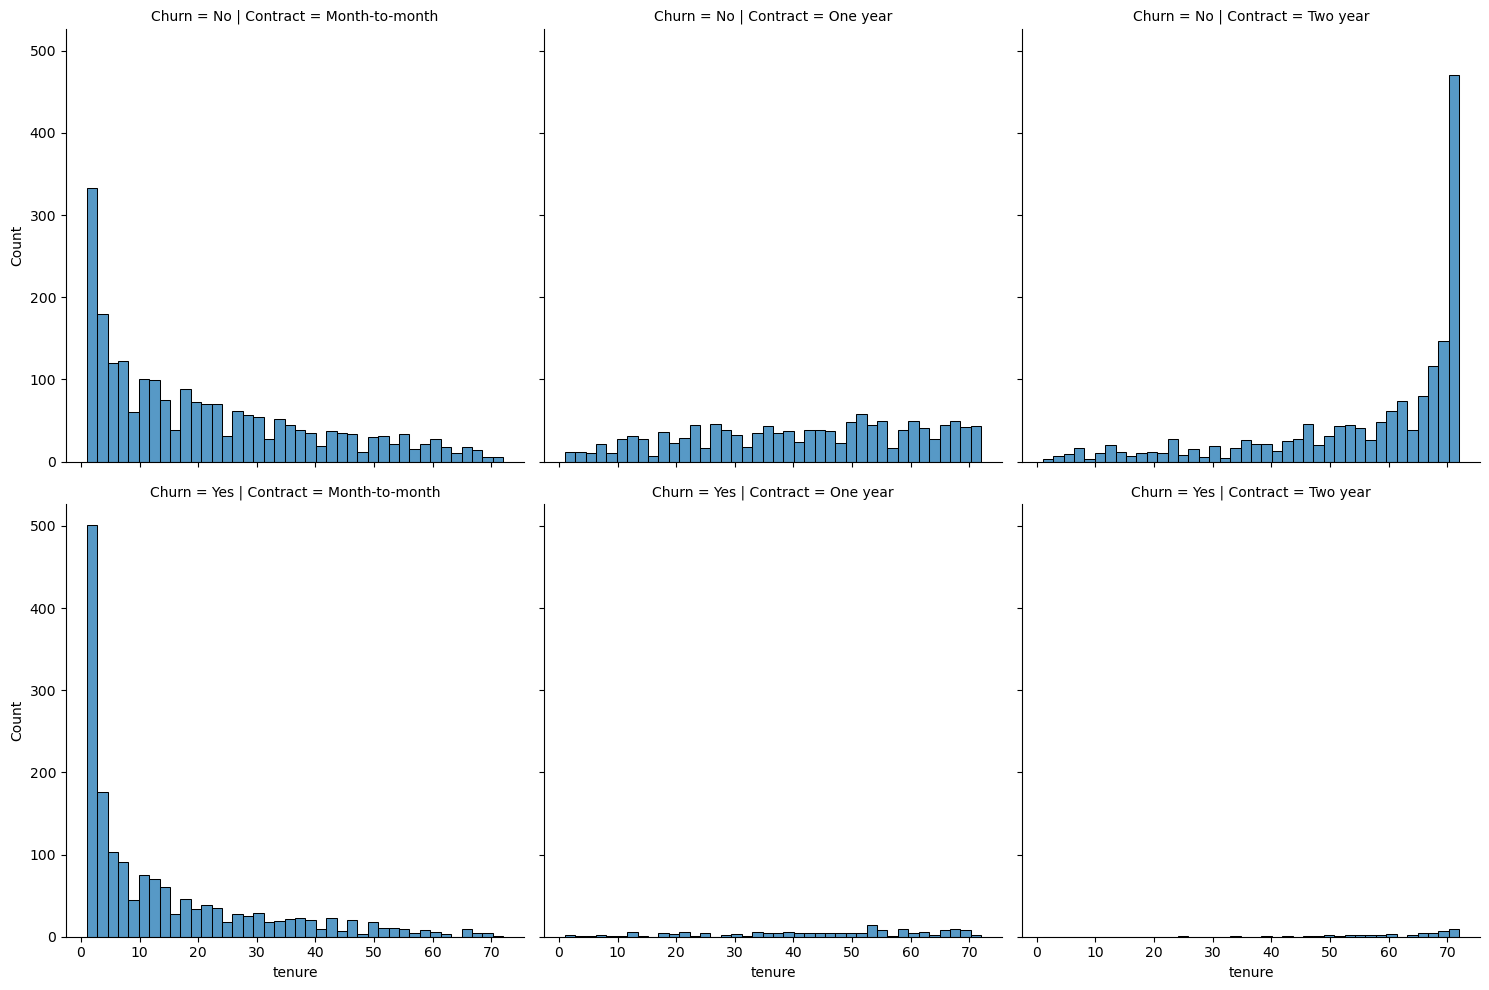

In [54]:
#CODE HERE
plt.figure(figsize=(13, 7), dpi=150)
sns.displot(data=df, x="tenure", bins=40, row="Churn", col="Contract")

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

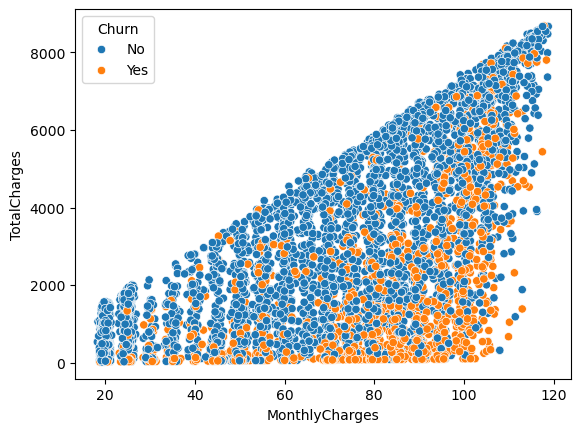

In [60]:
#CODE HERE
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn")

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [83]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [91]:
df[["tenure", "Churn"]].head()

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes


In [93]:
df[['MonthlyCharges', 'TotalCharges', 'Churn']].head()

,MonthlyCharges,TotalCharges,Churn
0,29.85,29.85,No
1,56.95,1889.50,No
2,53.85,108.15,Yes
3,42.30,1840.75,No
4,70.70,151.65,Yes


In [161]:
#CODE HERE

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [102]:
df.shape

(7032, 21)

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [187]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [189]:
df["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [158]:
# df.groupby(['Churn','tenure']) --> means two indexing are same then 
# corresponding columns will be sum up otherwise it will count just 1. 
no_churn = df.groupby(["Churn", "tenure"]).count().loc["No"]
yes_churn = df.groupby(["Churn", "tenure"]).count().loc["Yes"]

In [183]:
no_churn.columns.shape

(19,)

In [169]:
yes_churn_percent = yes_churn * 100/(yes_churn + no_churn)

In [202]:
yes_churn_percent.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301


<Axes: xlabel='tenure'>

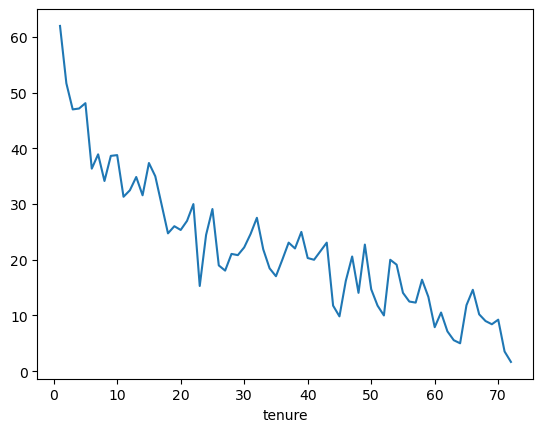

In [208]:
yes_churn_percent["customerID"].plot()

In [141]:
df[["Churn", "tenure"]].value_counts()

Churn  tenure
Yes    1         380
No     72        356
       1         233
       71        164
Yes    2         123
                ... 
       45          6
       60          6
       62          5
       64          4
       63          4
Name: count, Length: 144, dtype: int64

In [165]:
#CODE HERE

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [250]:
df["tenure"].isnull().sum()

0

In [252]:
df["tenure"].shape

(7032,)

In [264]:
dff = df["tenure"]

In [270]:
dff = pd.DataFrame({"Tenure Cohort": 
                   ['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months']})

In [304]:
df["Tenure Cohort"] = "Nan"

In [306]:
df[(df["tenure"] > 0) & (df["tenure"] < 12)]["Tenure Cohort"]

0       Nan
2       Nan
4       Nan
5       Nan
7       Nan
       ... 
7018    Nan
7019    Nan
7021    Nan
7029    Nan
7030    Nan
Name: Tenure Cohort, Length: 2058, dtype: object

In [362]:
df.loc[(df["tenure"] > 0) & (df["tenure"] <= 12), "Tenure Cohort"] = "0-12 Months"
df.loc[(df["tenure"] > 12) & (df["tenure"] <= 24), "Tenure Cohort"] = "12-24 Months"
df.loc[(df["tenure"] > 24) & (df["tenure"] <= 48), "Tenure Cohort"] = "24-48 Months"
df.loc[(df["tenure"] > 48), "Tenure Cohort"] = "Over 48 Months"

In [364]:
df["Tenure Cohort"].value_counts()

Tenure Cohort
Over 48 Months    2239
0-12 Months       2175
24-48 Months      1594
12-24 Months      1024
Name: count, dtype: int64

In [366]:
# CODE HERE
df.loc[(df["tenure"] > 0) & (df["tenure"] <= 12), "Tenure Cohort"] = "0-12 Months"
df.loc[(df["tenure"] > 12) & (df["tenure"] <= 24), "Tenure Cohort"] = "12-24 Months"
df.loc[(df["tenure"] > 24) & (df["tenure"] <= 48), "Tenure Cohort"] = "24-48 Months"
df.loc[(df["tenure"] > 48), "Tenure Cohort"] = "Over 48 Months"

In [370]:
df[["tenure", "Tenure Cohort"]]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

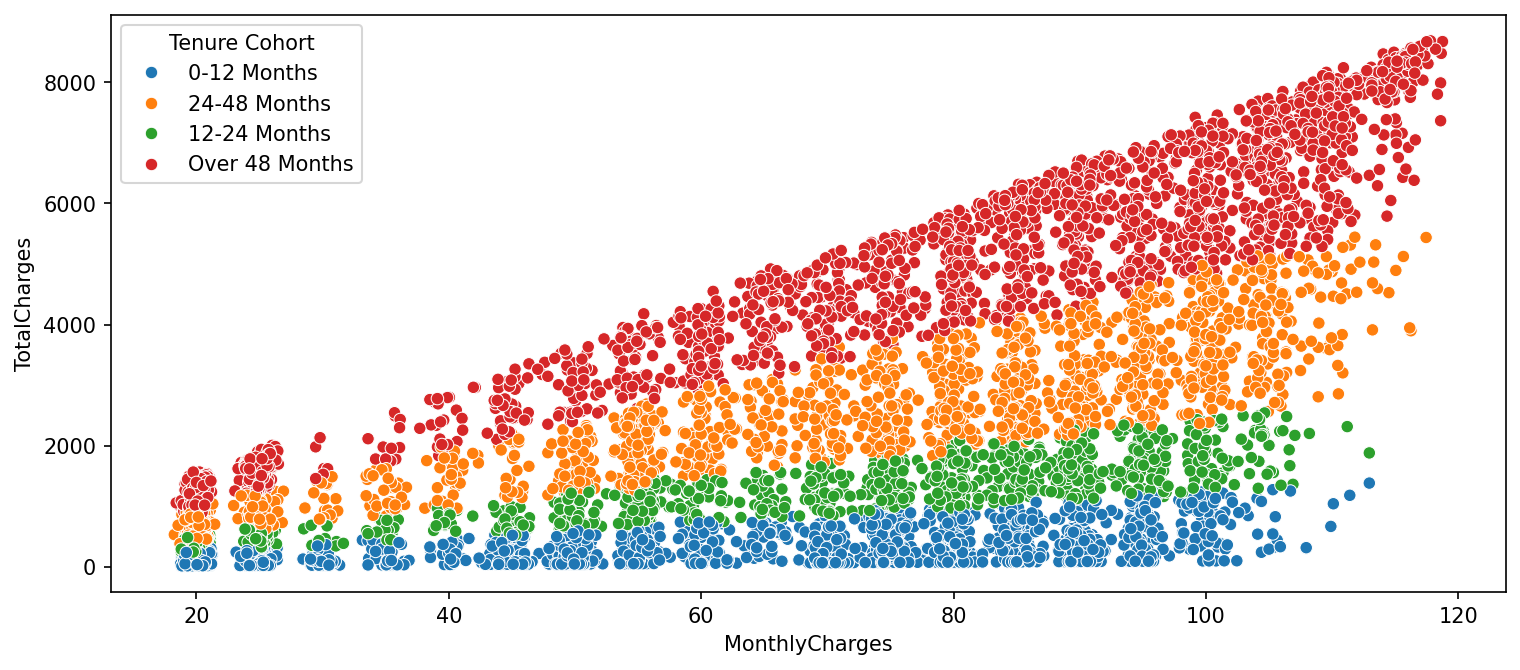

In [379]:
# Code here
plt.figure(figsize=(12, 5), dpi=150)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Tenure Cohort")

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

In [375]:
plt.figure(figsize=(12, 5), dpi=150)

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

<Axes: xlabel='Tenure Cohort', ylabel='count'>

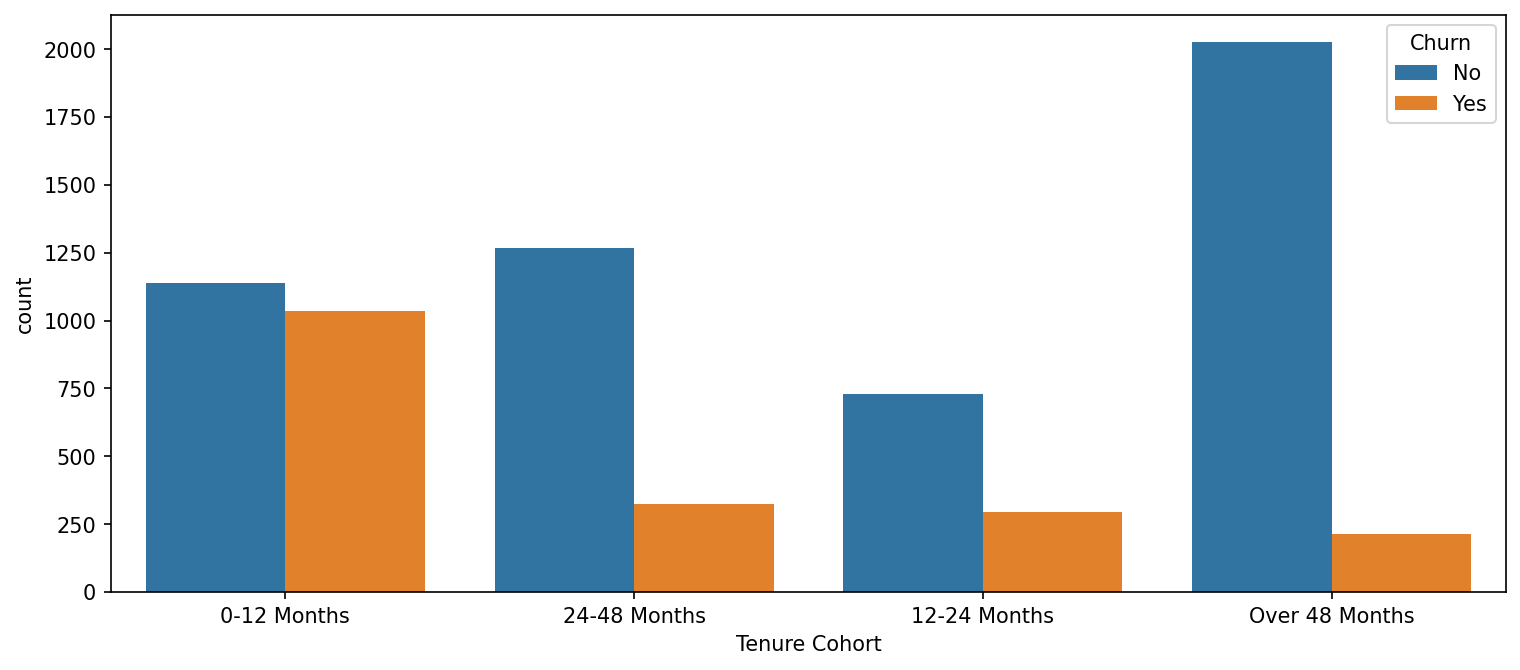

In [383]:
# CODE HERE
plt.figure(figsize=(12, 5), dpi=150)
sns.countplot(data=df, x="Tenure Cohort", hue="Churn")

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [386]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

<Figure size 1800x750 with 0 Axes>

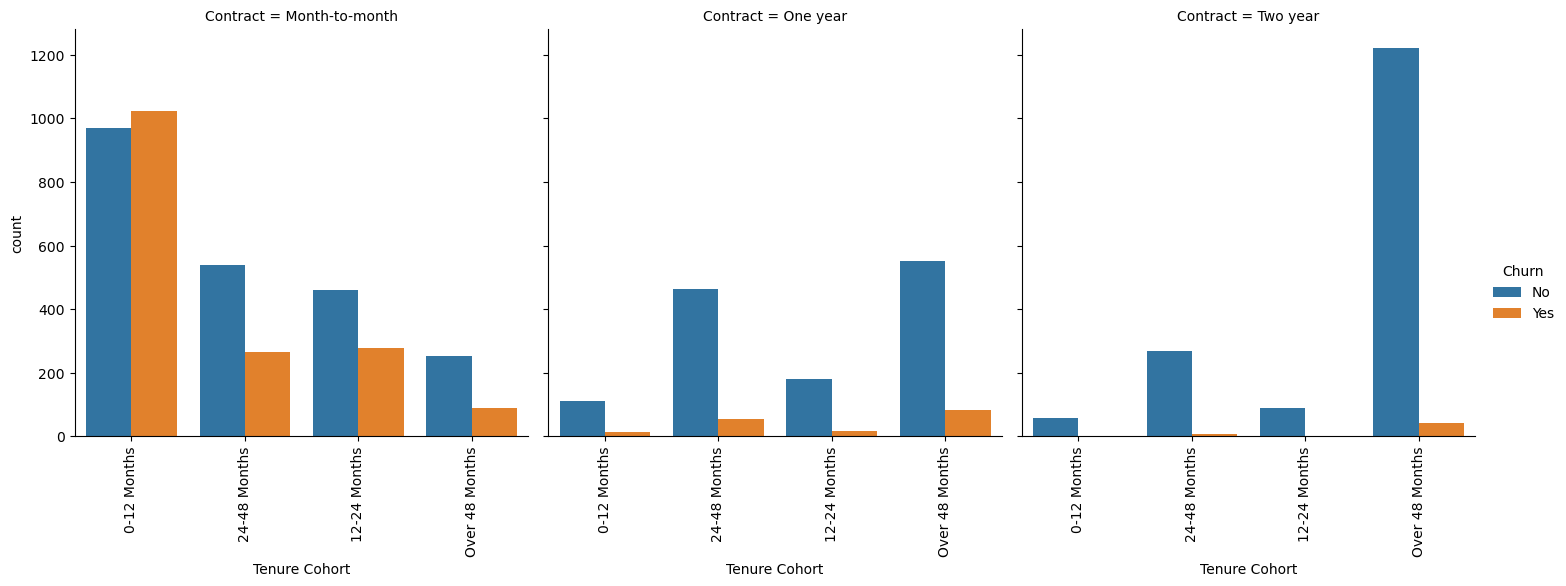

In [411]:
#CODE HERE
plt.figure(figsize=(12, 5), dpi=150)
#sns.catplot(data=df, x="Tenure Cohort", hue="Contract", color="Churn", kind="count")
ax = sns.catplot(data=df, x="Tenure Cohort", hue="Churn", col="Contract", kind="count")
ax.set_xticklabels(rotation=90);

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [120]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')
X = df.drop(["customerID", "Churn"], axis=1)
y = df["Churn"]

In [122]:
X = pd.get_dummies(X, drop_first=True)

In [124]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [126]:
X.shape

(7032, 30)

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [128]:
#CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [130]:
print(X_train.shape, X_test.shape)

(6328, 30) (704, 30)


In [132]:
print(y_train.shape, y_test.shape)

(6328,) (704,)


**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [134]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [136]:
dtc = DecisionTreeClassifier()

In [138]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [140]:
y_predict = dtc.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [148]:
confu_matrx = confusion_matrix(y_test, y_predict, labels=dtc.classes_)
confu_matrx

array([[444, 113],
       [ 73,  74]], dtype=int64)

In [150]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          No       0.86      0.80      0.83       557
         Yes       0.40      0.50      0.44       147

    accuracy                           0.74       704
   macro avg       0.63      0.65      0.63       704
weighted avg       0.76      0.74      0.75       704



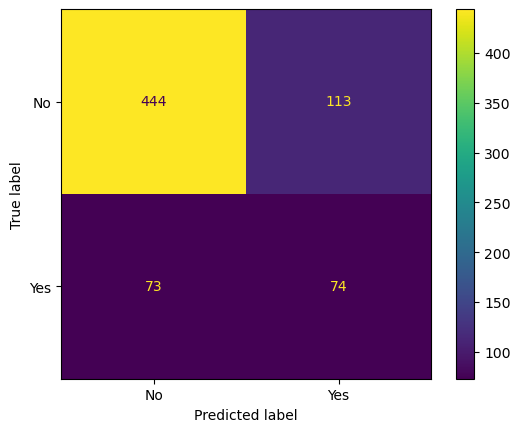

In [146]:
confu_disply = ConfusionMatrixDisplay(confu_matrx, display_labels=dtc.classes_)
confu_disply.plot()

In [160]:
dtc.feature_importances_

array([0.01829972, 0.20663563, 0.20238016, 0.19179191, 0.02211716,
       0.02028844, 0.01256357, 0.00410059, 0.00106996, 0.01681975,
       0.1086629 , 0.        , 0.        , 0.02351664, 0.        ,
       0.01910752, 0.        , 0.0119079 , 0.        , 0.01480138,
       0.00949725, 0.00809489, 0.0003527 , 0.01126691, 0.01487007,
       0.00984842, 0.02339542, 0.01269181, 0.0217761 , 0.01414319])

In [162]:
dtc.feature_importances_.shape

(30,)

In [166]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [196]:
feature_import = pd.DataFrame(data=dtc.feature_importances_, index=X.columns, columns=["Feature_Importances"]).sort_values(by="Feature_Importances")
feature_import

,Feature_Importances
OnlineBackup_No internet service,0.000000
TechSupport_No internet service,0.000000
InternetService_No,0.000000
OnlineSecurity_No internet service,0.000000
DeviceProtection_No internet service,0.000000
StreamingMovies_No internet service,0.000353
MultipleLines_No phone service,0.001070
PhoneService_Yes,0.004101
StreamingTV_Yes,0.008095
StreamingTV_No internet service,0.009497


In [202]:
Featu_imp = feature_import[feature_import["Feature_Importances"] > 0]

In [210]:
Featu_imp.index.shape

(25,)

In [214]:
feature_import.index.shape

(30,)

C:\Users\rd\AppData\Local\Temp\ipykernel_17076\135144910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Featu_imp, x=Featu_imp.index, y="Feature_Importances", palette="Set1")


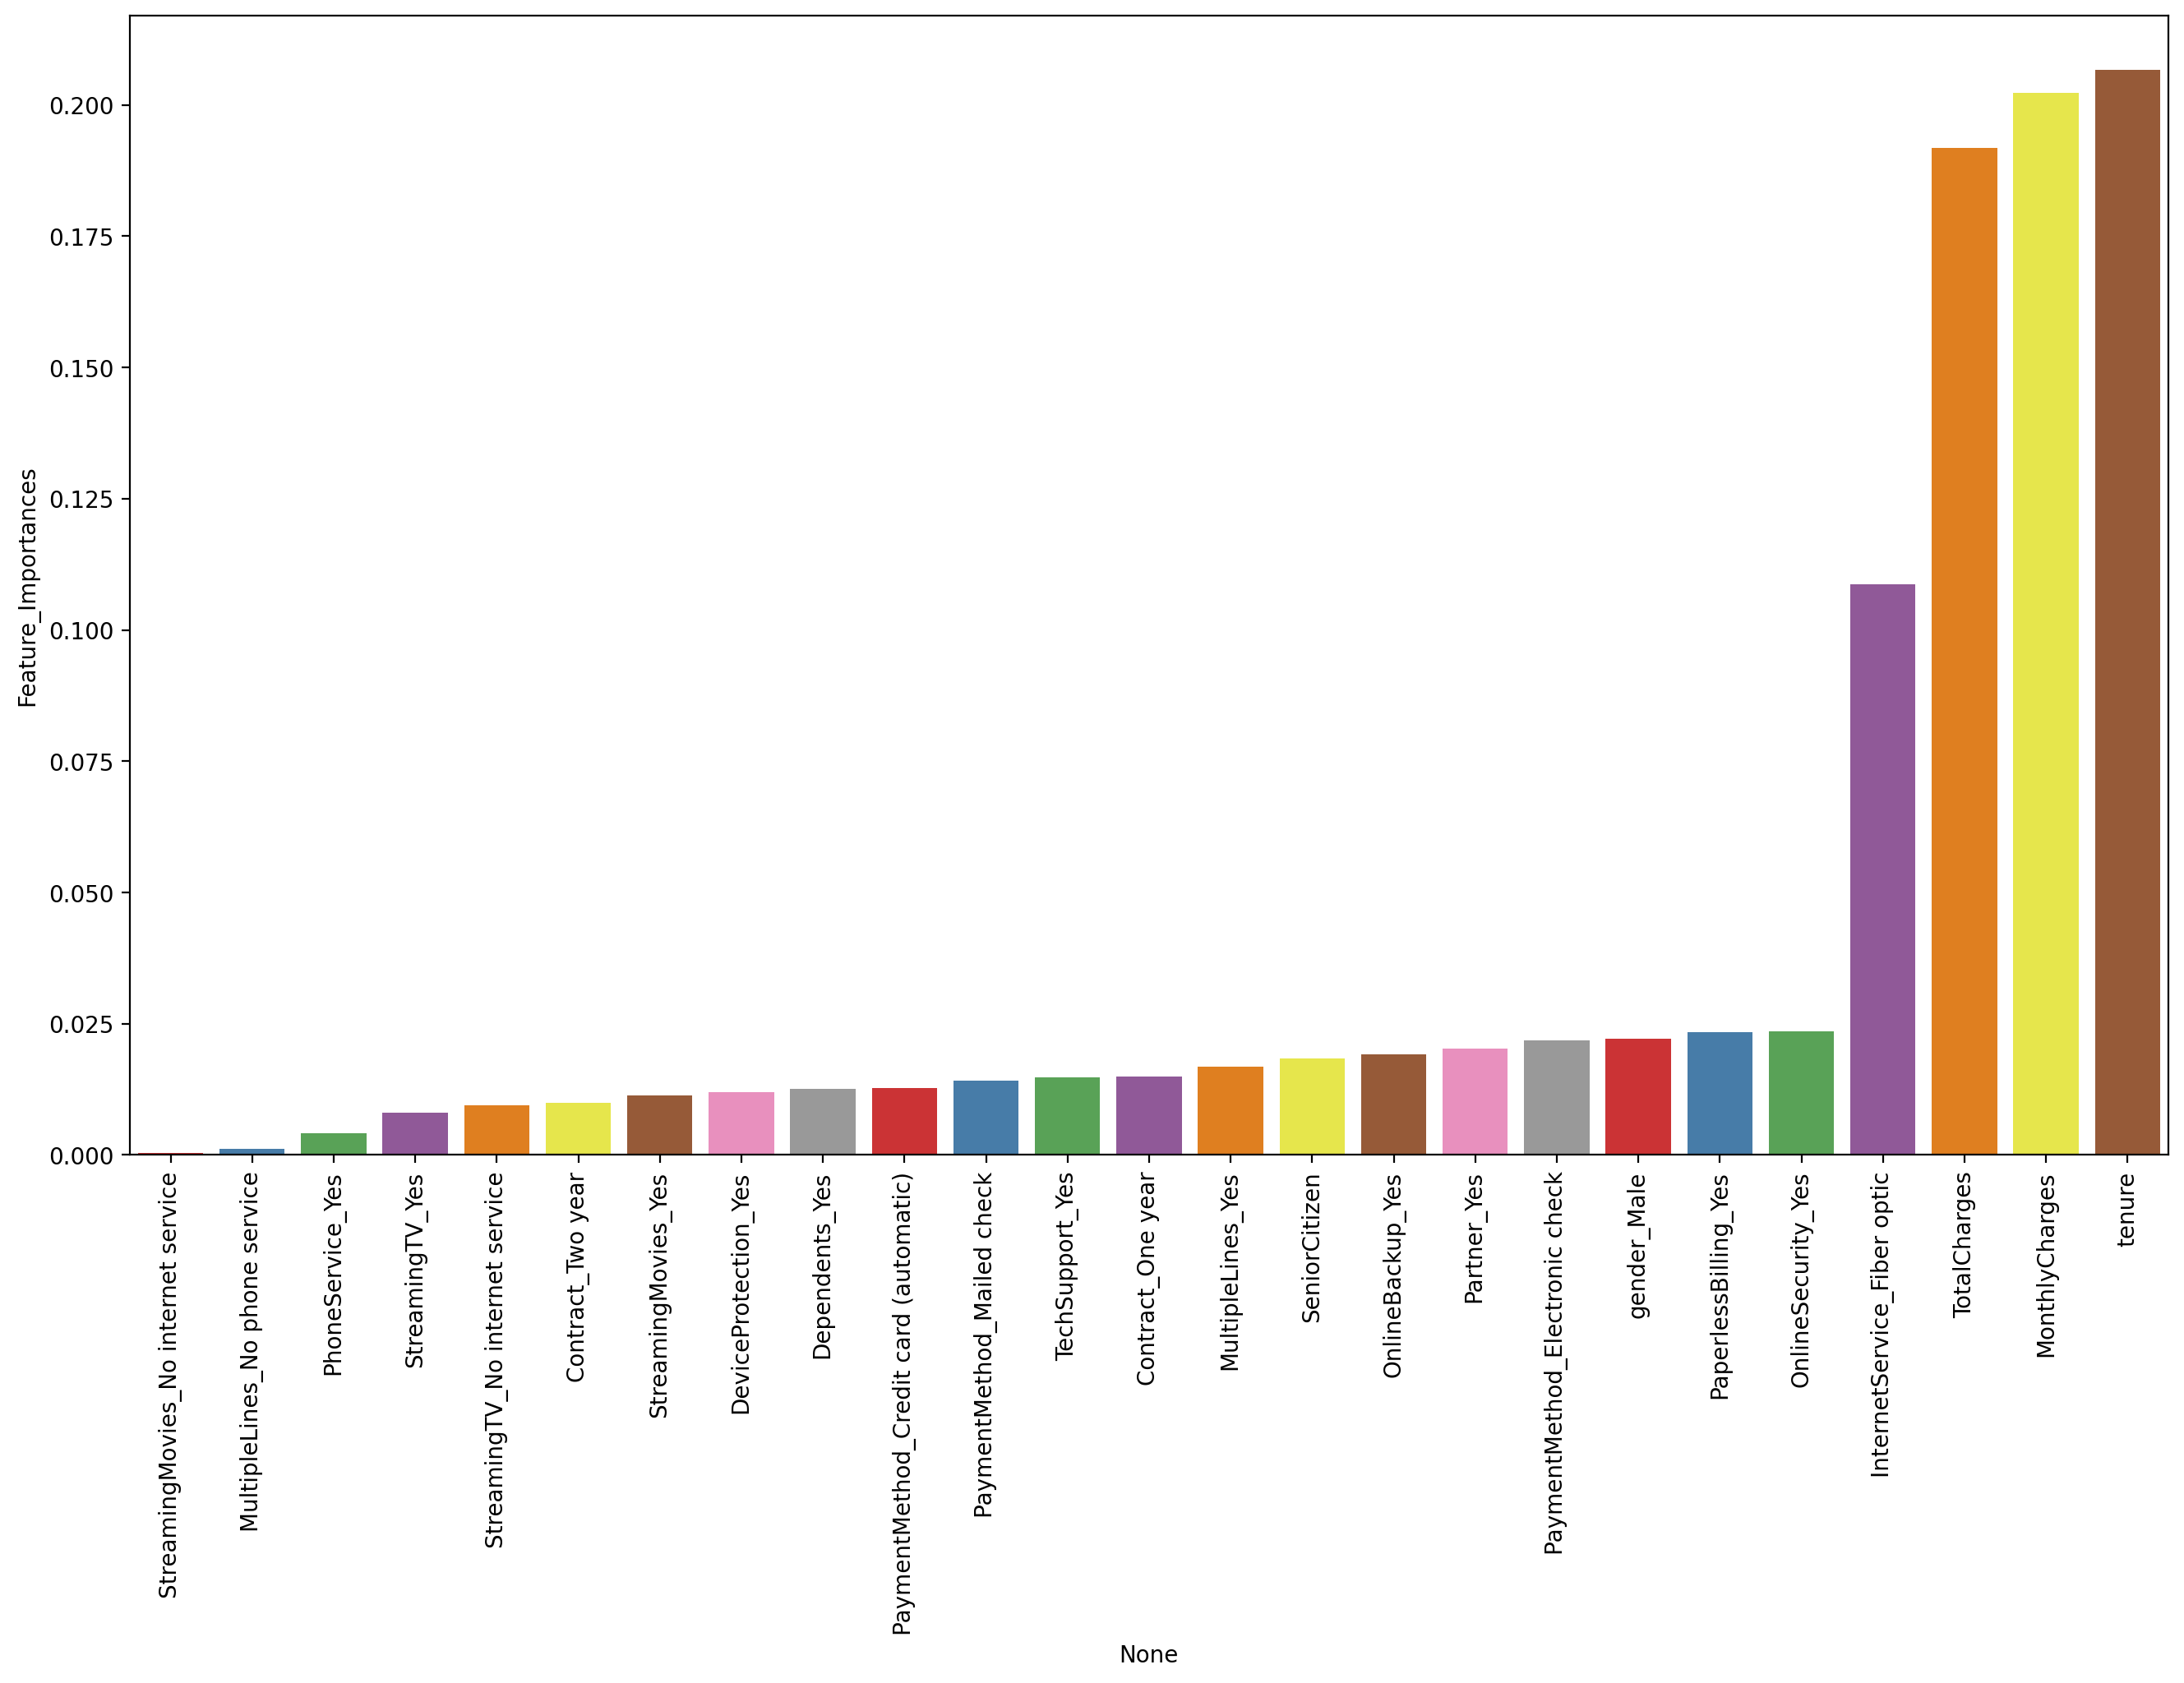

In [224]:
plt.figure(figsize=(16, 9), dpi=200)
sns.barplot(data=Featu_imp, x=Featu_imp.index, y="Feature_Importances", palette="Set1")
plt.xticks(rotation=90);

In [226]:
from sklearn.tree import plot_tree

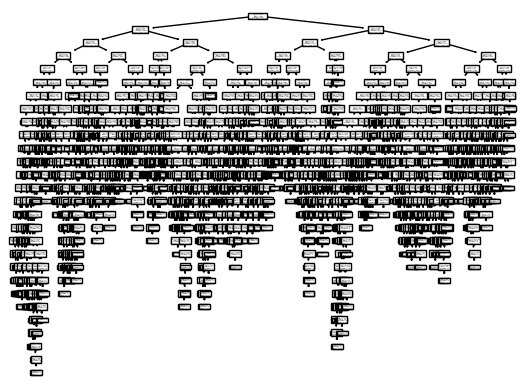

In [229]:
plot_tree(dtc);

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [231]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [248]:
#CODE HERE
rfc = RandomForestClassifier(max_depth=6)

In [250]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [252]:
y_predic_rfc = rfc.predict(X_test)

In [254]:
confu_matrx = confusion_matrix(y_test, y_predic_rfc, labels=dtc.classes_)
confu_matrx

array([[515,  42],
       [ 82,  65]], dtype=int64)

In [258]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          No       0.86      0.80      0.83       557
         Yes       0.40      0.50      0.44       147

    accuracy                           0.74       704
   macro avg       0.63      0.65      0.63       704
weighted avg       0.76      0.74      0.75       704



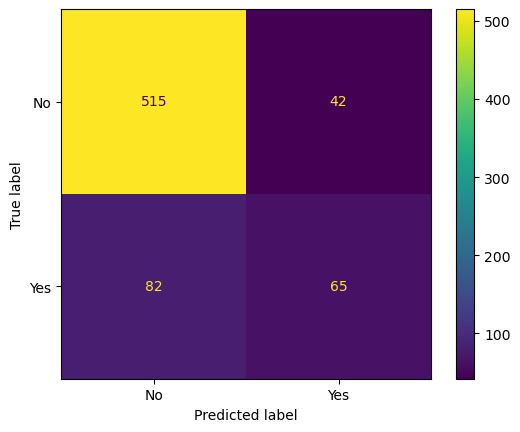

In [260]:
confu_disply = ConfusionMatrixDisplay(confu_matrx, display_labels=dtc.classes_)
confu_disply.plot()

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [262]:
#CODE HERE
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [312]:
ada_boost = AdaBoostClassifier(n_estimators=100)
gr_boost = GradientBoostingClassifier(n_estimators=100)

In [314]:
ada_boost

AdaBoostClassifier(n_estimators=100)

In [316]:
gr_boost

GradientBoostingClassifier()

In [318]:
ada_boost.fit(X_train, y_train)

C:\Users\rd\.conda\envs\tensorflow\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [319]:
ad_predic = ada_boost.predict(X_test)

In [322]:
gr_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [323]:
gr_predict = gr_boost.predict(X_test)

In [326]:
print(gr_predict.shape, ad_predic.shape)

(704,) (704,)


In [328]:
print(classification_report(ad_predic, y_test), classification_report(gr_predict, y_test))

              precision    recall  f1-score   support

          No       0.92      0.88      0.90       580
         Yes       0.53      0.63      0.58       124

    accuracy                           0.84       704
   macro avg       0.72      0.76      0.74       704
weighted avg       0.85      0.84      0.84       704
               precision    recall  f1-score   support

          No       0.90      0.87      0.89       577
         Yes       0.50      0.57      0.53       127

    accuracy                           0.82       704
   macro avg       0.70      0.72      0.71       704
weighted avg       0.83      0.82      0.82       704



In [330]:
confu_matrx = confusion_matrix(y_test, ad_predic, labels=ada_boost.classes_)
confu_matrx

array([[511,  46],
       [ 69,  78]], dtype=int64)

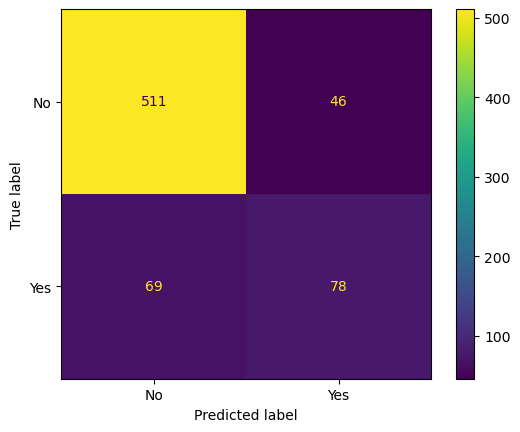

In [332]:
ada_confu_display = ConfusionMatrixDisplay(confu_matrx, display_labels=ada_boost.classes_)
ada_confu_display.plot()

In [334]:
confu_matrx = confusion_matrix(y_test, gr_predict, labels=gr_boost.classes_)
confu_matrx

array([[503,  54],
       [ 74,  73]], dtype=int64)

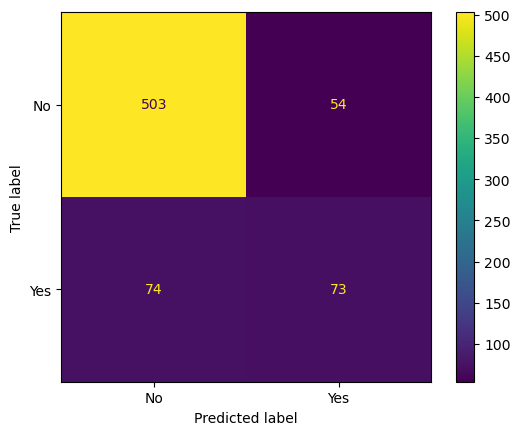

In [336]:
gr_confu_display = ConfusionMatrixDisplay(confu_matrx, display_labels=gr_boost.classes_)
gr_confu_display.plot()

**TASK: Analyze your results, which model performed best for you?**

# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.
***Ada boosting method has slightly better performace. 

### Great job!

In [345]:
expenses = pd.Series({'Andrew':200,'Bob':150,'Claire':450})

In [347]:
expenses

Andrew    200
Bob       150
Claire    450
dtype: int64

In [349]:
expenses.loc["Bob"]

150

In [351]:
expenses["Bob"]

150